## Customer Churn Prediction Project

### Importing Data

In [154]:
import pandas as pd
import numpy as np

In [155]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [156]:
import os
import pandas as pd

# Set the search parameters
filename = 'SalesData.xlsx'
filename2 = 'SalesData2.xlsx'
search_path = '/content/drive/My Drive/BDM Data'

# Search for the first file (SalesData.xlsx)
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path1 = os.path.join(root, filename)
        break

# Search for the second file (SalesData2.xlsx)
for root, dirs, files in os.walk(search_path):
    if filename2 in files:
        file_path2 = os.path.join(root, filename2)
        break

# Read the first dataset
df1 = pd.read_excel(file_path1)

# Read the second dataset
df2 = pd.read_excel(file_path2)

# Append the second dataset to the first dataset
df = pd.concat([df1, df2], ignore_index=True)

# Display the resulting DataFrame
print(df)


       DATA_FROM  QUARTER    TIME_PERIOD CURRENCY_NAME      BUSINESS_UNIT  \
0        Sell-To  CY20-Q1  Calendar Year           USD  Printing Supplies   
1        Sell-To  CY23-Q2  Calendar Year           USD  Printing Supplies   
2        Sell-To  CY22-Q4  Calendar Year           USD  Printing Supplies   
3        Sell-To  CY23-Q1  Calendar Year           USD  Printing Supplies   
4        Sell-To  CY20-Q4  Calendar Year           USD  Printing Supplies   
...          ...      ...            ...           ...                ...   
369223   Sell-To  FY23-Q1    Fiscal Year           USD  Printing Supplies   
369224   Sell-To  FY20-Q2    Fiscal Year           USD  Printing Supplies   
369225   Sell-To  FY23-Q3    Fiscal Year           USD  Printing Supplies   
369226   Sell-To  FY20-Q1    Fiscal Year           USD        Printing HW   
369227   Sell-To  FY21-Q4    Fiscal Year           BRL          Computing   

       CHAI_MAPPING PARTNER_MARKET PARTNER_COUNTRY         PARTNER_CLUSTER 

In [157]:
import os

# Set the search parameters
filename = 'SalesData.xlsx'
filename2 = 'SalesData2.xlsx'
search_path = '/content/drive/My Drive/BDM Data'

# Search for the first file (SalesData.xlsx)
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path1 = os.path.join(root, filename)
        break

# Search for the second file (SalesData2.xlsx)
for root, dirs, files in os.walk(search_path):
    if filename2 in files:
        file_path2 = os.path.join(root, filename2)
        break

In [158]:
import warnings
warnings.filterwarnings("ignore")

In [159]:
# Read the first dataset
df1 = pd.read_excel(file_path1)
# Read the second dataset
df2 = pd.read_excel(file_path2)
# Append the second dataset to the first dataset
df = pd.concat([df1, df2], ignore_index=True)

In [160]:
df.shape

(369228, 38)

### Pre-Processing

In [161]:
df.shape

(369228, 38)

In [162]:
df.head()

,DATA_FROM,QUARTER,TIME_PERIOD,CURRENCY_NAME,BUSINESS_UNIT,CHAI_MAPPING,PARTNER_MARKET,PARTNER_COUNTRY,PARTNER_CLUSTER,PRODUCT_SEGMENT,...,UNITS,SLS_TTY_IDENTIFIER,RAD_VERTICAL,EMP_TOTAL,EMPLOYEE_GROUP,TAM_PRINT,TAM_PS,REVENUE_PRINT,REVENUE_PS,PARTNER_HQ_NAME
0,Sell-To,CY20-Q1,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,4.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN
1,Sell-To,CY23-Q2,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN
2,Sell-To,CY22-Q4,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN
3,Sell-To,CY23-Q1,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,1.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN
4,Sell-To,CY20-Q4,Calendar Year,USD,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,...,4.0,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN


In [163]:
df.rename(columns = {'PrarowasRTNrarR_HQ_NrarowasMrar':'PARTNER_HQ_NAME'}, inplace = True)

Removing Useless Columns:

In [164]:
df = df.drop(['CURRENCY_NAME'], axis=1)

In [165]:
#NUMBER OF UNIQUE VALUES
print('BUSINESS UNIT:', df['BUSINESS_UNIT'].nunique())
print('CHAI_MAPPING:', df['CHAI_MAPPING'].nunique())
print('PRODUCT_SEGMENT:', df['PRODUCT_SEGMENT'].nunique())
print('PRODUCT_GROUP:', df['PRODUCT_GROUP'].nunique())
print('PRODUCT_CATEGORY:',df['PRODUCT_CATEGORY'].nunique())
print('PRODUCT_LINE_ID:',df['PRODUCT_LINE_ID'].nunique())

BUSINESS UNIT: 3
CHAI_MAPPING: 8
PRODUCT_SEGMENT: 20
PRODUCT_GROUP: 41
PRODUCT_CATEGORY: 82
PRODUCT_LINE_ID: 115


In [166]:
#NUMBER OF UNIQUE VALUES
print('PARTNER_MARKET:', df['PARTNER_MARKET'].nunique())
print('PARTNER_CLUSTER:', df['PARTNER_CLUSTER'].nunique())
print('PARTNER_COUNTRY:', df['PARTNER_COUNTRY'].nunique())

PARTNER_MARKET: 7
PARTNER_CLUSTER: 21
PARTNER_COUNTRY: 26


In [167]:
df.shape

(369228, 37)

In [168]:
print('PARTNER_CUSTOMER_ID:', df['PARTNER_CUSTOMER_ID'].nunique())
print('PARTNER_HQ_NAME:', df['PARTNER_HQ_NAME'].nunique())
print('PARTNER_LEVEL:', df['PARTNER_LEVEL'].nunique())

PARTNER_CUSTOMER_ID: 29732
PARTNER_HQ_NAME: PARTNER_HQ_NAME    15
PARTNER_HQ_NAME    38
dtype: int64
PARTNER_LEVEL: 3


In [169]:
print('OPSI_ID:', df['OPSI_ID'].nunique())
print('IS_OPSI:', df['IS_OPSI'].nunique())
print('ORG_ID:', df['ORG_ID'].nunique())
print('ORGANIZATION_EXTENDED_NAME:', df['ORGANIZATION_EXTENDED_NAME'].nunique())
print('ST_ID:', df['ST_ID'].nunique())
print('SALES_TERRITORY_EXTENDED_NAME:', df['SALES_TERRITORY_EXTENDED_NAME'].nunique())
print('ONLINE_FLAG:', df['ONLINE_FLAG'].nunique())
print('EMPLOYEE_GROUP:', df['EMPLOYEE_GROUP'].nunique())

OPSI_ID: 29141
IS_OPSI: 2
ORG_ID: 12439
ORGANIZATION_EXTENDED_NAME: 12129
ST_ID: 4114
SALES_TERRITORY_EXTENDED_NAME: 4106
ONLINE_FLAG: 2
EMPLOYEE_GROUP: 11


Removing columns with lot of missing values (More than half the total datapoints):

Processing Date from Quarters:

In [170]:
typ = df['QUARTER'].str.slice(0, 2, 1)
year = '20' + df['QUARTER'].str.slice(2, 4, 1)
qtr = df['QUARTER'].str.slice(5, 7, 1)

In [171]:
saledate = []
for i in range(0,len(typ)):
  st = ""
  if(typ[i] == 'CY'):
    if qtr[i] == 'Q1':
      st = st + year[i] + '-01' + '-01'
    elif qtr[i] == 'Q2':
      st = st + year[i] + '-04' + '-01'
    elif qtr[i] == 'Q3':
      st = st + year[i] + '-07' + '-01'
    elif qtr[i] == 'Q4':
      st = st + year[i] + '-10' + '-01'
  else:
    if qtr[i] == 'Q1':
      st = st + year[i] + '-11' + '-01'
    elif qtr[i] == 'Q2':
      st = st + year[i] + '-02' + '-01'
    elif qtr[i] == 'Q3':
      st = st + year[i] + '-05' + '-01'
    elif qtr[i] == 'Q4':
      st = st + year[i] + '-08' + '-01'
  saledate.append(st)

In [172]:
from datetime import timedelta
df['DATE'] = saledate
df['DATE'] = pd.to_datetime(df['DATE'])
df

,DATA_FROM,QUARTER,TIME_PERIOD,BUSINESS_UNIT,CHAI_MAPPING,PARTNER_MARKET,PARTNER_COUNTRY,PARTNER_CLUSTER,PRODUCT_SEGMENT,PRODUCT_GROUP,...,SLS_TTY_IDENTIFIER,RAD_VERTICAL,EMP_TOTAL,EMPLOYEE_GROUP,TAM_PRINT,TAM_PS,REVENUE_PRINT,REVENUE_PS,PARTNER_HQ_NAME,DATE
0,Sell-To,CY20-Q1,Calendar Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2020-01-01
1,Sell-To,CY23-Q2,Calendar Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2023-04-01
2,Sell-To,CY22-Q4,Calendar Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2022-10-01
3,Sell-To,CY23-Q1,Calendar Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2023-01-01
4,Sell-To,CY20-Q4,Calendar Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2020-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369223,Sell-To,FY23-Q1,Fiscal Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,84583.0,EDUCATION,746.0,501-1000,59534.08,3341212.49,2561.23,2429156.43,"Copiers Northwest, Inc",2023-11-01
369224,Sell-To,FY20-Q2,Fiscal Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,84583.0,EDUCATION,746.0,501-1000,59534.08,3341212.49,2561.23,2429156.43,"Copiers Northwest, Inc",2020-02-01
369225,Sell-To,FY23-Q3,Fiscal Year,Printing Supplies,Supplies,North America,USA,United States Extended,Office Printing Solutions Supplies,Printing,...,NaN,BANKING,21.0,1950-11-01 00:00:00,NaN,NaN,NaN,NaN,"Copiers Northwest, Inc",2023-05-01
369226,Sell-To,FY20-Q1,Fiscal Year,Printing HW,Print HW,North America,USA,United States Extended,Office Printing Solutions HW,Printing,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,"Copiers Northwest, Inc",2020-11-01


In [173]:
#df.to_excel('output_file.xlsx', index=False)

In [174]:
df_c = df

In [175]:
df_c['PRODUCT_CATEGORY'].isnull().sum()

0

Creating the Churn Label:

In [176]:
df = df.sort_values(by=['PARTNER_ID', 'DATE'])
df

,DATA_FROM,QUARTER,TIME_PERIOD,BUSINESS_UNIT,CHAI_MAPPING,PARTNER_MARKET,PARTNER_COUNTRY,PARTNER_CLUSTER,PRODUCT_SEGMENT,PRODUCT_GROUP,...,SLS_TTY_IDENTIFIER,RAD_VERTICAL,EMP_TOTAL,EMPLOYEE_GROUP,TAM_PRINT,TAM_PS,REVENUE_PRINT,REVENUE_PS,PARTNER_HQ_NAME,DATE
2742,Shipments/Sell-Thru,CY18-Q4,Calendar Year,Computing,Displays,Central and Eastern Europe,Israel,Israel,Business PC Solutions,Commercial Displays Solutions & 3PO,...,74869.0,LEISURE AND HOSPITALITY,93391.0,> 1000,4516086.79,23689495.97,4833052.55,22016063.09,NaN,2018-10-01
2743,Shipments/Sell-Thru,CY18-Q4,Calendar Year,Computing,Peripherals,Central and Eastern Europe,Israel,Israel,Business PC Solutions,Commercial Peripherals,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2018-10-01
5357,Shipments/Sell-Thru,CY18-Q4,Calendar Year,Computing,PC HW,Central and Eastern Europe,Israel,Israel,Business PC Solutions,Commercial Compute,...,302942.0,BUSINESS SERVICES,6000.0,> 1000,66000.00,2456014.00,0.00,1601261.58,NaN,2018-10-01
21491,Shipments/Sell-Thru,CY18-Q4,Calendar Year,Computing,PC HW,Central and Eastern Europe,Israel,Israel,Business PC Solutions,Commercial Compute,...,304449.0,GOVERNMENT CENTRAL,150000.0,> 1000,4125000.00,30000000.00,1385322.36,23860093.92,NaN,2018-10-01
21492,Shipments/Sell-Thru,CY18-Q4,Calendar Year,Computing,PC HW,Central and Eastern Europe,Israel,Israel,Business PC Solutions,Commercial Compute,...,NaN,NaN,NaN,NOT IDENTIFIED,NaN,NaN,NaN,NaN,NaN,2018-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213407,Sell-To,FY23-Q1,Fiscal Year,Printing Supplies,Supplies,Central and Eastern Europe,Slovakia,CZ/SK,NaN,NaN,...,NaN,ENGINEERING SERVICES,3.0,065410-2023,NaN,NaN,NaN,NaN,NaN,2023-11-01
216288,Sell-To,FY23-Q1,Fiscal Year,Printing Supplies,Supplies,Central and Eastern Europe,Slovakia,CZ/SK,NaN,NaN,...,NaN,DISCRETE - ENERGY & NAT. RES.,19.0,NaN,NaN,NaN,NaN,NaN,NaN,2023-11-01
216936,Sell-To,FY23-Q1,Fiscal Year,Printing Supplies,Supplies,Central and Eastern Europe,Slovakia,CZ/SK,NaN,NaN,...,700100144.0,BUSINESS SERVICES,12.0,NaN,299.00,962.00,0.00,0.00,NaN,2023-11-01
220596,Shipments/Sell-Thru,FY23-Q1,Fiscal Year,Computing,PC HW,Central and Eastern Europe,Slovakia,CZ/SK,Business PC Solutions,Commercial Compute,...,600680412.0,OTHER,253.0,20654500,0.00,0.00,0.00,0.00,NaN,2023-11-01


In [177]:
'''df['purchase_flag'] = df.apply(lambda x: 1 if (x['UNITS'] > 0 or x['REVENUE_USD'] > 0) else 0, axis=1)
# Create the churn label: Check if the sum of purchases in the last two quarters is 0
df['churn_label'] = df.groupby('PARTNER_ID')['purchase_flag'].rolling(window=2, min_periods=2).sum().reset_index(0, drop=True)
df['churn_label'] = df['churn_label'].apply(lambda x: 1 if x == 0 else 0)
df'''

"df['purchase_flag'] = df.apply(lambda x: 1 if (x['UNITS'] > 0 or x['REVENUE_USD'] > 0) else 0, axis=1)\n# Create the churn label: Check if the sum of purchases in the last two quarters is 0\ndf['churn_label'] = df.groupby('PARTNER_ID')['purchase_flag'].rolling(window=2, min_periods=2).sum().reset_index(0, drop=True)\ndf['churn_label'] = df['churn_label'].apply(lambda x: 1 if x == 0 else 0)\ndf"

In [178]:
import datetime
from datetime import datetime
saledate2 = []
for i in saledate:
  dt = datetime.strptime(i, '%Y-%m-%d')
  saledate2.append(dt)

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [181]:
df_check = df

In [182]:
#df.to_excel('output_file_churn.xlsx', index=False)

Creating the Aggregate Column:

In [183]:
# Drop Irrelevant Columns
drop_columns = ['QUARTER', 'TIME_PERIOD', 'PARTNER_HQ_NAME', 'PARTNER_CUSTOMER_ID', 'OPSI_ID',
                'ORG_ID', 'ORGANIZATION_EXTENDED_NAME', 'ST_ID', 'SLS_TTY_IDENTIFIER',
                'EMP_TOTAL', 'EMPLOYEE_GROUP', 'TAM_PRINT', 'TAM_PS', 'REVENUE_PRINT', 'REVENUE_PS',
                'REAL_UNITS', 'PRODUCT_UNITS', 'REVENUE_LC','SALES_TERRITORY_EXTENDED_NAME']

df = df.drop(columns=drop_columns, errors='ignore')

In [185]:
from itertools import product

# Extract Year and Quarter based on month
df['year'] = df['DATE'].dt.year  # Extracts Year
df['quarter'] = df['DATE'].dt.quarter  # Automatically assigns quarters

df['IS_OPSI'] = df['IS_OPSI'].astype(int)
df['ONLINE_FLAG'] = df['ONLINE_FLAG'].apply(lambda x: 0 if x == 'N' else 1)

df['PRODUCT_CATEGORY'] = df['PRODUCT_CATEGORY'].str.lower()

# Step 1: Aggregate sales per (Customer, Product Category, Quarter)
agg_df = df.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter']).agg({
    'UNITS': 'sum',
    'REVENUE_USD': 'sum',
    'DATA_FROM': 'first',
    'IS_OPSI': 'max',
    'ONLINE_FLAG': 'max',
    'PARTNER_LEVEL': 'first',
    'PARTNER_MARKET': 'first',
    'PARTNER_CLUSTER': 'first',
    'PARTNER_COUNTRY': 'first',
    'BUSINESS_UNIT': 'first',
    'CHAI_MAPPING': 'first',
    'PRODUCT_SEGMENT': 'first',
    'PRODUCT_GROUP': 'first',
    'RAD_VERTICAL': 'first',
    'DATE': 'max',  # Most recent purchase date
}).reset_index()

agg_df['total_transactions'] = df.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter']).size().values

# Step 2: Generate a complete Quarter-Year Grid for all Partner-Product combinations
all_partners = df['PARTNER_ID'].unique()
all_products = df['PRODUCT_CATEGORY'].unique()
all_years = df['year'].unique()
all_years = all_years[all_years != 2018]
all_quarters = [1, 2, 3, 4]  # Fixed Q1 to Q4

# Create all possible (PARTNER_ID, PRODUCT_CATEGORY, year, quarter) combinations
full_grid = pd.DataFrame(list(product(all_partners, all_products, all_years, all_quarters)),
                         columns=['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter'])

# Step 3: Merge with actual data to ensure missing quarters are filled
agg_df = full_grid.merge(agg_df, on=['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter'], how='left')

# Step 4: Fill missing values (assume no purchase if missing)
agg_df['UNITS'].fillna(0, inplace=True)
agg_df['REVENUE_USD'].fillna(0, inplace=True)
agg_df['RAD_VERTICAL'].fillna("Unknown", inplace=True)

# Step 5: Create purchase flag
agg_df['purchase_flag'] = agg_df.apply(lambda x: 1 if (x['UNITS'] > 0 or x['REVENUE_USD'] > 0) else 0, axis=1)

In [186]:
# Step 6: Correctly Calculate Churn Label (Check if no purchase in last two quarters)
agg_df['prev_2_quarters_purchases'] = agg_df.groupby(['PARTNER_ID', 'PRODUCT_CATEGORY'])['purchase_flag'] \
    .rolling(window=2, min_periods=2).sum().reset_index(level=[0, 1], drop=True)

agg_df['category_churn_label'] = agg_df['prev_2_quarters_purchases'].apply(lambda x: 1 if x == 0 else 0)

# Step 7: Merge back into the main dataset
#df = df.merge(agg_df[['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter', 'category_churn_label__']], on=['PARTNER_ID', 'PRODUCT_CATEGORY', 'year', 'quarter'], how='left')

In [187]:
#agg_df.groupby('PRODUCT_CATEGORY')['category_churn_label'].value_counts().unstack()

Data cleaning the Aggregate Dataframe

In [188]:
agg_df['category_churn_label'].value_counts()

,count
category_churn_label,
1,37896
0,12984


In [194]:
# Compute churn label counts per product category
category_churn_counts = agg_df.groupby('PRODUCT_CATEGORY')['category_churn_label'].value_counts().unstack(fill_value=0)

# Define the filtering condition:
# Keep product categories where either:
# 1. More churn_label = 0 than churn_label = 1
# 2. churn_label = 1 is at most 50% more than churn_label = 0
categories_to_keep = category_churn_counts[
    (category_churn_counts[0] > category_churn_counts[1]) |  # More 0s than 1s
    (category_churn_counts[1] <= 1.5 * category_churn_counts[0])  # 1s are at most 50% higher than 0s
].index.tolist()
agg_df2 = agg_df[agg_df['PRODUCT_CATEGORY'].isin(categories_to_keep)]

In [211]:
agg_df['category_churn_label'].value_counts()

,count
category_churn_label,
0,7515
1,6265


In [197]:
agg_df = agg_df2

Feature Engineering:

In [200]:
agg_df

,PARTNER_ID,PRODUCT_CATEGORY,year,quarter,UNITS,REVENUE_USD,DATA_FROM,IS_OPSI,ONLINE_FLAG,PARTNER_LEVEL,...,BUSINESS_UNIT,CHAI_MAPPING,PRODUCT_SEGMENT,PRODUCT_GROUP,RAD_VERTICAL,DATE,total_transactions,purchase_flag,prev_2_quarters_purchases,category_churn_label
20,0345M99-18534,commercial peripherals,2019,1,0.0,36648.08,0.0,0.0,1.0,Power Services,...,Computing,Peripherals,Business PC Solutions,Commercial Peripherals,HIGH TECH/ELECTRONICS/SOFTWARE,2019-02-01,43.0,1,NaN,0
21,0345M99-18534,commercial peripherals,2019,2,0.0,49109.33,0.0,0.0,1.0,Power Services,...,Computing,Peripherals,Business PC Solutions,Commercial Peripherals,HIGH TECH/ELECTRONICS/SOFTWARE,2019-05-01,40.0,1,2.0,0
22,0345M99-18534,commercial peripherals,2019,3,0.0,42300.04,0.0,0.0,1.0,Power Services,...,Computing,Peripherals,Business PC Solutions,Commercial Peripherals,DISCRETE MANUFACTURING,2019-08-01,31.0,1,2.0,0
23,0345M99-18534,commercial peripherals,2019,4,0.0,38118.27,0.0,0.0,1.0,Power Services,...,Computing,Peripherals,Business PC Solutions,Commercial Peripherals,DISCRETE MANUFACTURING,2019-11-01,35.0,1,2.0,0
24,0345M99-18534,commercial peripherals,2020,1,0.0,52563.67,0.0,0.0,1.0,Power Services,...,Computing,Peripherals,Business PC Solutions,Commercial Peripherals,DISCRETE MANUFACTURING,2020-02-01,32.0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50335,654VOZFNY,large format design,2022,4,812.0,205321.06,1.0,0.0,1.0,Power,...,Printing HW,Print HW,CO Large Format,CO Large Format,DISCRETE - ENERGY & NAT. RES.,2022-11-01,167.0,1,2.0,0
50336,654VOZFNY,large format design,2023,1,777.0,121975.99,1.0,0.0,1.0,Power,...,Printing Supplies,Supplies,CO Large Format,CO Large Format,WHOLESALE TRADE,2023-02-01,152.0,1,2.0,0
50337,654VOZFNY,large format design,2023,2,615.0,104934.57,1.0,0.0,1.0,Power,...,Printing Supplies,Supplies,CO Large Format,CO Large Format,RETAIL,2023-05-01,118.0,1,2.0,0
50338,654VOZFNY,large format design,2023,3,0.0,0.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Unknown,NaT,NaN,0,1.0,0


In [199]:
agg_df.isnull().sum()

,0
PARTNER_ID,0
PRODUCT_CATEGORY,0
year,0
quarter,0
UNITS,0
REVENUE_USD,0
DATA_FROM,7584
IS_OPSI,7584
ONLINE_FLAG,7584
PARTNER_LEVEL,7584


In [ ]:
#THE MISSING VALUES WHICH WERE ADDED TO ADDRESS MISSING QUARTER DATA NEEDS SOME DEFAULT VALUES SET

In [ ]:
# Step 4: Apply Data Preprocessing

## Convert Binary Columns to 0/1
agg_df['DATA_FROM'] = agg_df['DATA_FROM'].map({'Shipments/Sell-Thru': 0, 'Sell-To': 1})
agg_df['IS_OPSI'] = agg_df['IS_OPSI'].astype(int)
agg_df['ONLINE_FLAG'] = agg_df['ONLINE_FLAG'].map({'N': 0, 'Y': 1}).fillna(0)

## Frequency Encoding for High Cardinality Features
agg_df['PARTNER_ID'] = agg_df.groupby('PARTNER_ID')['PARTNER_ID'].transform('count')

## One-Hot Encoding for Low Cardinality Features
one_hot_features = ['PARTNER_LEVEL', 'PARTNER_MARKET', 'PARTNER_CLUSTER', 'PARTNER_COUNTRY']
agg_df = pd.get_dummies(agg_df, columns=one_hot_features)

## Target Encoding for Product Hierarchy
product_hierarchy = ['BUSINESS_UNIT', 'CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'PRODUCT_CATEGORY']
target_encoder = TargetEncoder()
agg_df[product_hierarchy] = target_encoder.fit_transform(agg_df[product_hierarchy], agg_df['category_churn_label'])

In [ ]:
# Step 5: Feature Engineering
agg_df['is_returned'] = agg_df.apply(lambda x: 1 if x['UNITS'] < 0 or x['REVENUE_USD'] < 0 else 0, axis=1)

# Handling Negative Values
agg_df['UNITS'] = agg_df['UNITS'].apply(lambda x: 0 if x < 0 else x)
agg_df['REVENUE_USD'] = agg_df['REVENUE_USD'].apply(lambda x: 0 if x < 0 else x)

# Fill missing values
agg_df['REVENUE_USD'].fillna(0, inplace=True)
agg_df['UNITS'].fillna(0, inplace=True)

In [ ]:
agg_df

Adding new useful columns:

In [ ]:
# Rolling window features for churn prediction
agg_df['total_purchases_last_4q'] = agg_df.groupby('PARTNER_ID')['UNITS'].rolling(window=4, min_periods=1).sum().reset_index(0, drop=True)
agg_df['total_revenue_last_4q'] = agg_df.groupby('PARTNER_ID')['REVENUE_USD'].rolling(window=4, min_periods=1).sum().reset_index(0, drop=True)
agg_df['average_purchase_value'] = agg_df['total_revenue_last_4q'] / (agg_df['total_purchases_last_4q'] + 1)

# Revenue trend feature
agg_df['revenue_trend'] = agg_df.groupby('PARTNER_ID')['REVENUE_USD'].pct_change()
agg_df['revenue_trend'].replace([np.inf, -np.inf], np.nan, inplace=True)
agg_df['revenue_trend'].fillna(0, inplace=True)

# Distinct product purchase count features
agg_df['num_distinct_products'] = agg_df.groupby('PARTNER_ID')['PRODUCT_CATEGORY'].transform('nunique')
agg_df['num_product_segments'] = agg_df.groupby('PARTNER_ID')['PRODUCT_SEGMENT'].transform('nunique')

# End of year flag
agg_df['is_end_of_year_q4'] = (agg_df['quarter'] == 4).astype(int)

# Step 6: Handle Missing Values
agg_df['RAD_VERTICAL'].fillna("Unknown", inplace=True)
agg_df['total_purchases_last_4q'].fillna(0, inplace=True)
agg_df['average_purchase_value'].fillna(0, inplace=True)

In [ ]:
agg_df

In [ ]:
agg_df.to_excel('final_df.xlsx', index=False)

#### Dropping Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from category_encoders import TargetEncoder

In [ ]:
df = df.sort_values(by=['PARTNER_ID', 'DATE'])

# Drop irrelevant columns
drop_columns = ['QUARTER', 'TIME_PERIOD', 'PARTNER_HQ_NAME', 'PARTNER_CUSTOMER_ID', 'OPSI_ID',
                'ORG_ID', 'ORGANIZATION_EXTENDED_NAME', 'ST_ID', 'SLS_TTY_IDENTIFIER',
                'EMP_TOTAL', 'EMPLOYEE_GROUP', 'TAM_PRINT', 'TAM_PS', 'REVENUE_PRINT', 'REVENUE_PS',
                'REAL_UNITS', 'PRODUCT_UNITS', 'REVENUE_LC','SALES_TERRITORY_EXTENDED_NAME']
df = df.drop(columns=drop_columns)

#### Categorical Feature Processing

In [ ]:
# Convert Binary Columns to 0/1
df['DATA_FROM'] = df['DATA_FROM'].map({'Shipments/Sell-Thru': 0, 'Sell-To': 1})
df['IS_OPSI'] = df['IS_OPSI'].astype(int)
df['ONLINE_FLAG'] = df['ONLINE_FLAG'].map({'N': 0, 'Y': 1})
df['ONLINE_FLAG'] = df['ONLINE_FLAG'].fillna(0)  # Fill missing values with 0

# Frequency Encoding for High Cardinality Categorical Features
df['PARTNER_ID'] = df.groupby('PARTNER_ID')['PARTNER_ID'].transform('count')

# One-Hot Encoding for Low Cardinality Categorical Features
one_hot_features = ['PARTNER_LEVEL', 'PARTNER_MARKET', 'PARTNER_CLUSTER', 'PARTNER_COUNTRY']
df = pd.get_dummies(df, columns=one_hot_features)

# Target Encoding for Product Hierarchy
product_hierarchy = ['BUSINESS_UNIT', 'CHAI_MAPPING', 'PRODUCT_SEGMENT', 'PRODUCT_GROUP', 'PRODUCT_CATEGORY']
target_encoder = TargetEncoder()
df[product_hierarchy] = target_encoder.fit_transform(df[product_hierarchy], df['churn_label'])

#### New Features Engineering

In [ ]:
df['is_returned'] = df.apply(lambda x: 1 if x['UNITS'] < 0 or x['REVENUE_USD'] < 0 else 0, axis=1)
# Handling negative values
df['UNITS'] = df['UNITS'].apply(lambda x: 0 if x < 0 else x)  # Convert to absolute or set to zero
df['REVENUE_USD'] = df['REVENUE_USD'].apply(lambda x: 0 if x < 0 else x)  # Convert to absolute or set to zero
df['REVENUE_USD'] = df['REVENUE_USD'].fillna(0)
df['UNITS'] = df['UNITS'].fillna(0)

In [ ]:
df['total_purchases_last_4q'] = df.groupby('PARTNER_ID')['UNITS'].rolling(window=4, min_periods=1).sum().reset_index(0, drop=True)
df['total_revenue_last_4q'] = df.groupby('PARTNER_ID')['REVENUE_USD'].rolling(window=4, min_periods=1).sum().reset_index(0, drop=True)
df['average_purchase_value'] = df['total_revenue_last_4q'] / (df['total_purchases_last_4q'] + 1)
#df['recency_days'] = (df['DATE'].max() - df.groupby('PARTNER_ID')['DATE'].transform('max')).dt.days

df['revenue_trend'] = df.groupby('PARTNER_ID')['REVENUE_USD'].pct_change()
# Handle infinity values
df['revenue_trend'].replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace inf/-inf with NaN
df['revenue_trend'].fillna(0, inplace=True)  # Replace NaN with 0 (assuming no trend data available)

df['num_distinct_products'] = df.groupby('PARTNER_ID')['PRODUCT_CATEGORY'].transform('nunique')
df['num_product_segments'] = df.groupby('PARTNER_ID')['PRODUCT_SEGMENT'].transform('nunique')
df['is_end_of_year_q4'] = (df['DATE'].dt.quarter == 4).astype(int)

In [ ]:
# Fill missing values
df['RAD_VERTICAL'] = df['RAD_VERTICAL'].fillna("Unknown")  # Categorical missing values
df['total_purchases_last_4q'] = df['total_purchases_last_4q'].fillna(0)
df['average_purchase_value'] = df['average_purchase_value'].fillna(0)

In [ ]:
df

In [ ]:
attr = 'revenue_trend'
def check_outliers(attr):
  print('NumUniq:', df[attr].nunique())
  print('Null values',df[attr].isna().sum())
  print('Min value:',df[attr].min())
  print('Max value:',df[attr].max())
  print(df.shape)
  plt.figure(figsize = (14,8))
  plt.style.use('ggplot')
  plt.subplot(1, 1, 1)
  sns.distplot(df[attr],bins=14,color='sienna')
check_outliers(attr)

In [ ]:
# Scale Numerical Features
scaler = MinMaxScaler()
numerical_features = ['total_purchases_last_4q', 'total_revenue_last_4q', 'average_purchase_value', 'revenue_trend', 'REVENUE_USD', 'UNITS']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [ ]:
df

### EDA:

In [ ]:
df['churn_label'].value_counts()

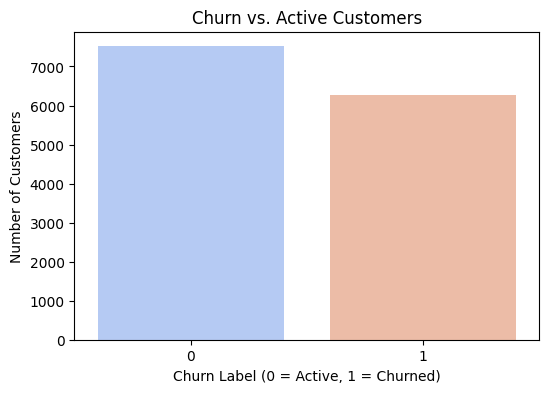

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='category_churn_label', data=agg_df, palette="coolwarm")
plt.title("Churn vs. Active Customers")
plt.xlabel("Churn Label (0 = Active, 1 = Churned)")
plt.ylabel("Number of Customers")
plt.show()

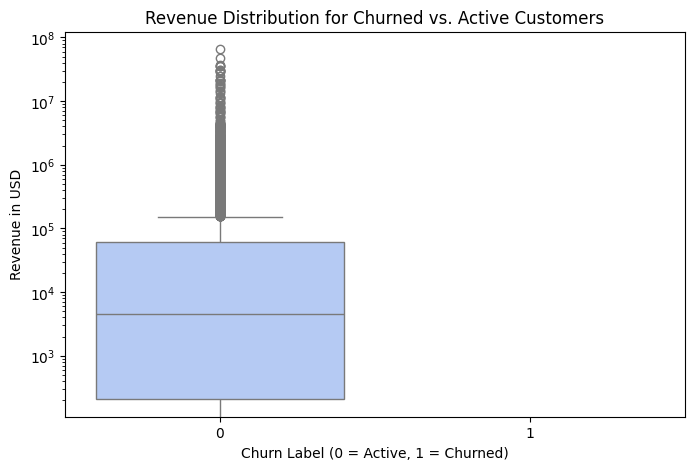

In [202]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='category_churn_label', y='REVENUE_USD', data=agg_df, palette="coolwarm")
plt.title("Revenue Distribution for Churned vs. Active Customers")
plt.xlabel("Churn Label (0 = Active, 1 = Churned)")
plt.ylabel("Revenue in USD")
plt.yscale('log')  # Log scale to handle outliers
plt.show()

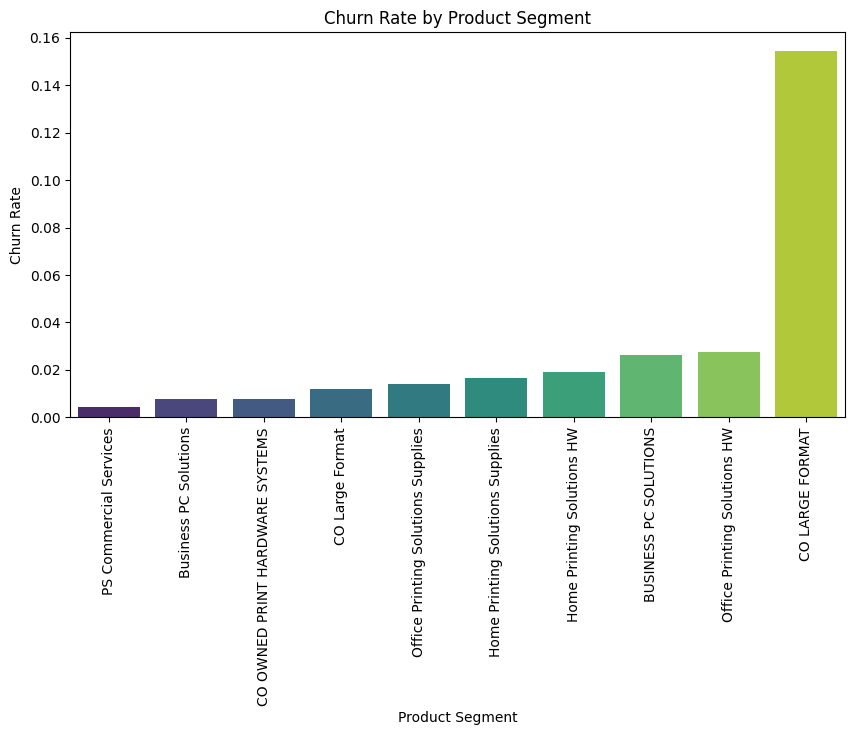

In [204]:
churn_by_product = agg_df.groupby('PRODUCT_SEGMENT')['category_churn_label'].mean().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=churn_by_product.index, y=churn_by_product.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Churn Rate by Product Segment")
plt.xlabel("Product Segment")
plt.ylabel("Churn Rate")
plt.show()


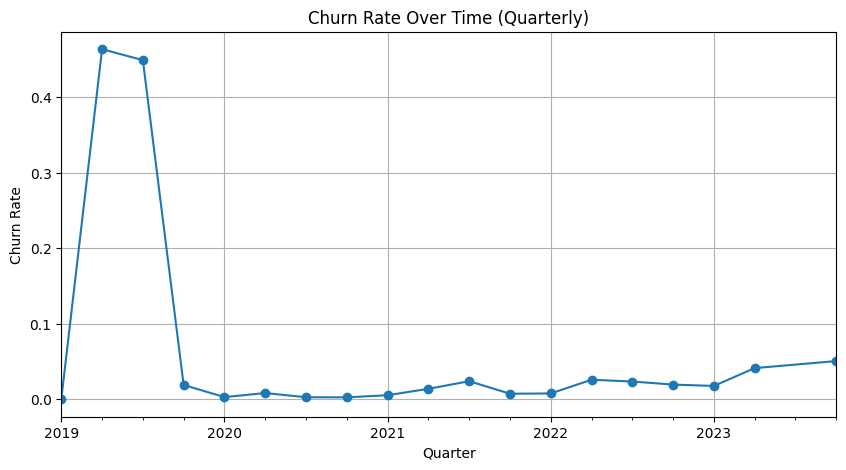

In [205]:
agg_df['DATE'] = pd.to_datetime(agg_df['DATE'])
churn_trend = agg_df.groupby(agg_df['DATE'].dt.to_period("Q"))['category_churn_label'].mean()

plt.figure(figsize=(10, 5))
churn_trend.plot(marker='o', linestyle='-')
plt.title("Churn Rate Over Time (Quarterly)")
plt.xlabel("Quarter")
plt.ylabel("Churn Rate")
plt.grid(True)
plt.show()

In [208]:
import plotly.express as px

# Aggregate churn rate by country
churn_by_country = agg_df.groupby('PARTNER_COUNTRY')['category_churn_label'].mean().reset_index()

fig = px.choropleth(churn_by_country,
                    locations="PARTNER_COUNTRY",
                    locationmode="country names",
                    color="category_churn_label",
                    title="Churn Rate by Country",
                    color_continuous_scale="reds")
fig.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='category_churn_label', y='revenue_trend', data=agg_df, palette="coolwarm")
plt.title("Revenue Trend Before Churn")
plt.xlabel("Churn Label (0 = Active, 1 = Churned)")
plt.ylabel("Revenue Trend (%)")
plt.show()

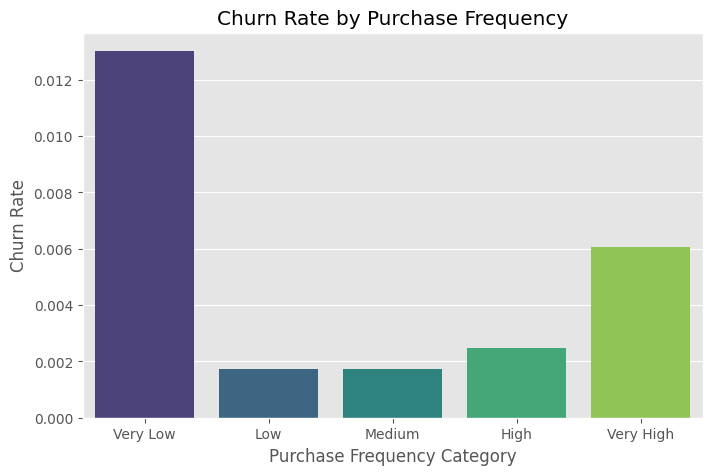

In [202]:
df['purchase_bin'] = pd.qcut(df['total_purchases_last_4q'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

churn_by_freq = df.groupby('purchase_bin')['churn_label'].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=churn_by_freq.index, y=churn_by_freq.values, palette="viridis")
plt.title("Churn Rate by Purchase Frequency")
plt.xlabel("Purchase Frequency Category")
plt.ylabel("Churn Rate")
plt.show()


------------------------------

### Model Building:

In [ ]:
# Yet to start